# Semiconductor Carrier Concentrations and Fermi Statistics

This notebook models:
- Electron and hole concentrations in silicon
- Intrinsic carrier concentration
- Fermi-Dirac and Boltzmann approximations
- Temperature-dependent plots and log-scale visualization



### Electron concentration in conduction band
$$
n_0 = N_c \cdot \exp\left(-\frac{E_c - E_F}{kT}\right)
$$

### Hole concentration in valence band
$$
p_0 = N_v \cdot \exp\left(-\frac{E_F - E_v}{kT}\right)
$$

### Intrinsic carrier concentration
$$
n_i = \sqrt{n_0 \cdot p_0} = \sqrt{N_c \cdot N_v} \cdot \exp\left(-\frac{E_g}{2kT}\right)
$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
k = 8.617333262e-5  # eV/K
q = 1.602176634e-19 # C
h = 6.62607015e-34  # J*s
me = 9.10938356e-31 # kg

# Effective masses for silicon
me_eff = 1.08 * me  # electron effective mass
mh_eff = 0.56 * me  # hole effective mass

# Band gap for silicon
Eg = 1.12  # eV

# Example Case for this study - Energy difference Ec - Ef
Ec_minus_Ef = 0.25  # eV

# Temperature range
T = np.linspace(100, 600, 500)


In [2]:
# Calculate Nc and Nv
Nc = 2 * ((2 * np.pi * me_eff * q * k * T) / h**2)**1.5 / 1e6  # cm^-3
Nv = 2 * ((2 * np.pi * mh_eff * q * k * T) / h**2)**1.5 / 1e6  # cm^-3

# Calculate n0, p0
n0 = Nc * np.exp(-Ec_minus_Ef / (k * T))
p0 = Nv * np.exp(-(Eg - Ec_minus_Ef) / (k * T))
ni = np.sqrt(n0 * p0)


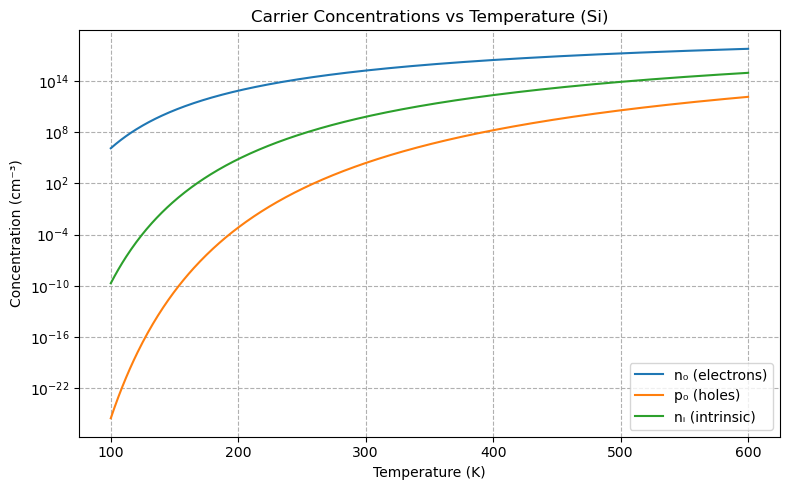

In [3]:
plt.figure(figsize=(8, 5))
plt.semilogy(T, n0, label='n₀ (electrons)')
plt.semilogy(T, p0, label='p₀ (holes)')
plt.semilogy(T, ni, label='nᵢ (intrinsic)')
plt.title("Carrier Concentrations vs Temperature (Si)")
plt.xlabel("Temperature (K)")
plt.ylabel("Concentration (cm⁻³)")
plt.grid(True, which='both', ls='--')
plt.legend()
plt.tight_layout()
plt.show()


\
### Fermi-Dirac distribution

$$
f_F(E) = \frac{1}{1 + \exp\left(\frac{E - E_F}{kT}\right)}
$$

### Boltzmann approximation 

$$
f_B(E) \approx \exp\left(-\frac{E - E_F}{kT}\right)
$$


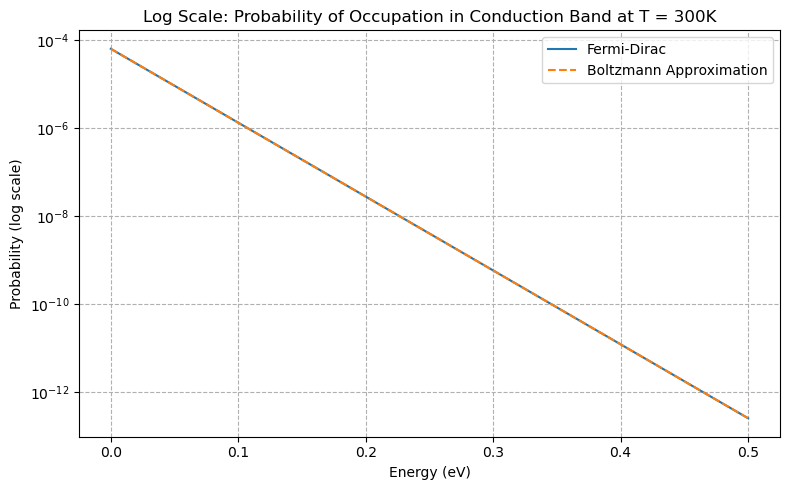

In [4]:
Ef = -0.25  # eV (Fermi level below Ec)
Ec = 0.0    # eV
T_fermi = 300
kT_val = k * T_fermi
E = np.linspace(Ec, Ec + 0.5, 200)

f_fermi = 1 / (1 + np.exp((E - Ef) / kT_val))
f_boltz = np.exp(-(E - Ef) / kT_val)

plt.figure(figsize=(8, 5))
plt.semilogy(E, f_fermi, label='Fermi-Dirac')
plt.semilogy(E, f_boltz, '--', label='Boltzmann Approximation')
plt.title("Log Scale: Probability of Occupation in Conduction Band at T = 300K")
plt.xlabel("Energy (eV)")
plt.ylabel("Probability (log scale)")
plt.grid(True, which='both', ls='--')
plt.legend()
plt.tight_layout()
plt.show()
